In [1]:
import numpy as np
%matplotlib_svg

## 庞大的函数库

### 随机数

In [2]:
from numpy import random as nr
np.set_printoptions(precision=2) # 为了节省篇幅，只显示小数点后两位数字
r1 = nr.rand(4, 3)
r2 = nr.randn(4, 3)
r3 = nr.randint(0, 10, (4, 3))

%C r1; r2; r3

           r1                       r2                 r3    
-----------------------  -----------------------  -----------
[[ 0.87,  0.42,  0.34],  [[-1.32, -0.03, -0.05],  [[5, 9, 1],
 [ 0.25,  0.87,  0.42],   [ 0.34, -0.42, -0.41],   [2, 9, 8],
 [ 0.49,  0.18,  0.44],   [ 0.59, -0.49, -0.01],   [2, 6, 6],
 [ 0.53,  0.23,  0.81]]   [-1.92, -0.13, -1.34]]   [3, 8, 1]]


In [3]:
r1 = nr.normal(100, 10, (4, 3))
r2 = nr.uniform(10, 20, (4, 3))
r3 = nr.poisson(2.0, (4, 3))

%C r1; r2; r3

              r1                           r2                   r3    
-----------------------------  --------------------------  -----------
[[ 102.89,  103.56,  111.46],  [[ 19.  ,  18.69,  14.38],  [[3, 1, 5],
 [  83.54,  122.36,   98.31],   [ 17.97,  10.16,  12.47],   [2, 2, 3],
 [  87.95,  106.89,   99.28],   [ 19.36,  10.91,  19.65],   [2, 4, 4],
 [  92.66,  103.13,  106.28]]   [ 16.79,  16.46,  16.32]]   [2, 2, 3]]


In [4]:
a = np.array([1, 10, 20, 30, 40])
print((nr.permutation(10)))
print((nr.permutation(a)))

[2 4 3 5 6 8 0 1 9 7]
[40  1 10 20 30]


In [5]:
nr.shuffle(a)
a

array([ 1, 20, 30, 10, 40])

In [6]:
a = np.arange(10, 25, dtype=float)
c1 = nr.choice(a, size=(4, 3))
c2 = nr.choice(a, size=(4, 3), replace=False)
c3 = nr.choice(a, size=(4, 3), p=a / np.sum(a))

%C c1; c2; c3

         c1                    c2                    c3         
--------------------  --------------------  --------------------
[[ 12.,  22.,  17.],  [[ 10.,  14.,  23.],  [[ 21.,  24.,  23.],
 [ 24.,  13.,  14.],   [ 24.,  13.,  19.],   [ 19.,  18.,  19.],
 [ 19.,  23.,  23.],   [ 11.,  22.,  20.],   [ 24.,  21.,  22.],
 [ 17.,  19.,  22.]]   [ 15.,  17.,  18.]]   [ 22.,  21.,  21.]]


In [7]:
r1 = nr.randint(0, 100, 3)
r2 = nr.randint(0, 100, 3)
nr.seed(42)
r3 = nr.randint(0, 100, 3)
nr.seed(42)
r4 = nr.randint(0, 100, 3)
%C r1; r2; r3; r4

     r1            r2            r3            r4     
------------  ------------  ------------  ------------
[84, 14, 46]  [23, 20, 66]  [51, 92, 14]  [51, 92, 14]


### 求和、平均值、方差

In [9]:
np.random.seed(42)
a = np.random.randint(0,10,size=(4,5))
%C a; np.sum(a)

        a          np.sum(a)
-----------------  ---------
[[6, 3, 7, 4, 6],  96       
 [9, 2, 6, 7, 4],           
 [3, 7, 7, 2, 5],           
 [4, 1, 7, 5, 1]]           


In [10]:
%C np.sum(a, axis=1); np.sum(a, axis=0)

np.sum(a, axis=1)   np.sum(a, axis=0)  
-----------------  --------------------
[26, 28, 24, 18]   [22, 13, 27, 18, 16]


In [11]:
np.sum(np.ones((2, 3, 4)), axis=(0, 2))

array([ 8.,  8.,  8.])

In [12]:
%C np.sum(a, 1, keepdims=True); np.sum(a, 0, keepdims=True)

np.sum(a, 1, keepdims=True)  np.sum(a, 0, keepdims=True)
---------------------------  ---------------------------
[[26],                       [[22, 13, 27, 18, 16]]     
 [28],                                                  
 [24],                                                  
 [18]]                                                  


In [13]:
pa = a / np.sum(a, 1, dtype=float, keepdims=True) * 100
%C 2 pa; pa.sum(1, keepdims=True)

                    pa                      pa.sum(1, keepdims=True)
------------------------------------------  ------------------------
[[ 23.08,  11.54,  26.92,  15.38,  23.08],  [[ 100.],               
 [ 32.14,   7.14,  21.43,  25.  ,  14.29],   [ 100.],               
 [ 12.5 ,  29.17,  29.17,   8.33,  20.83],   [ 100.],               
 [ 22.22,   5.56,  38.89,  27.78,   5.56]]   [ 100.]]               


In [2]:
np.set_printoptions(precision=8)
b = np.full(1000000, 1.1, dtype=np.float32) # 创建一个很大的单精度浮点数数组
b # 1.1无法使用浮点数精确表示，存在一些误差

array([ 1.10000002,  1.10000002,  1.10000002, ...,  1.10000002,
        1.10000002,  1.10000002], dtype=float32)

In [19]:
%C np.sum(b); np.sum(b, dtype=np.double)

np.sum(b)  np.sum(b, dtype=np.double)
---------  --------------------------
1099999.3  1100000.0238418579        


In [16]:
np.mean(a, axis=1) # 整数数组使用双精度浮点数进行计算

array([ 5.2,  5.6,  4.8,  3.6])

In [17]:
%C np.mean(b); np.mean(b, dtype=np.double)

np.mean(b)  np.mean(b, dtype=np.double)
----------  ---------------------------
1.0999993   1.1000000238418579         


In [20]:
score = np.array([83, 72, 79])
number = np.array([20, 15, 30])
print((np.average(score, weights=number)))

78.6153846154


In [21]:
print((np.sum(score * number) / np.sum(number, dtype=float)))

78.6153846154


In [22]:
a = nr.normal(0, 2.0, (100000, 10)) 
v1 = np.var(a, axis=1, ddof=0) #可以省略ddof=0
v2 = np.var(a, axis=1, ddof=1)
%C np.mean(v1); np.mean(v2)

   np.mean(v1)         np.mean(v2)    
------------------  ------------------
3.6008566906846693  4.0009518785385216


In [23]:
def normal_pdf(mean, var, x):
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(x - mean) ** 2 / (2 * var))

nr.seed(42)
data = nr.normal(0, 2.0, size=10)                         #❶
mean, var = np.mean(data), np.var(data)                   #❷
var_range = np.linspace(max(var - 4, 0.1), var + 4, 100)  #❸

p = normal_pdf(mean, var_range[:, None], data)            #❹
p = np.product(p, axis=1)                                 #❺

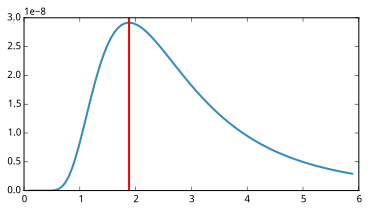

In [24]:
#%fig=偏样本方差位于似然估计曲线的最大值处
import pylab as pl
pl.plot(var_range, p)
pl.axvline(var, 0, 1, c="r")
pl.show()